<a href="https://colab.research.google.com/github/niyatisrivastava/MAJOR_PROJECT/blob/main/Operations_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
git remote add origin https://github.com/niyatisrivastava/Operator-Clasification.git
git branch -M main
git push -u origin main

SyntaxError: ignored

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive
#Check the present working directory using pwd command

/content/gdrive/My Drive


In [ ]:
from PIL import Image

In [ ]:

import numpy as np
 
 # Img = Image.open ( "1.jpg") # open the image of PIL Image.open
img = Image.open("/content/gdrive/MyDrive/operators/10/9989.jpg", 'r').convert('RGB')
 
 #image_arr = np.array (img) # is converted into an array numpy
img = np.asarray(img, 'float32')

In [ ]:
img = img/255

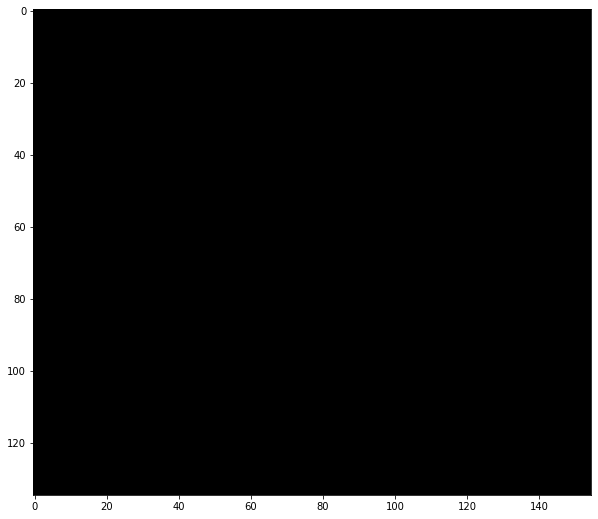

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
from glob import glob 
import cv2
class_names = ['10', '11', '12', '13']

 # Img = Image.open ( "1.jpg") # open the image of PIL Image.open
TRAIN_DATA_DIR = '/content/gdrive/MyDrive/operators/*/*.jpg'
data = glob(TRAIN_DATA_DIR)
training_data=[]
training_label=[]

data_count= len(data)
for d in data:
    training_data.append(cv2.resize(cv2.imread(d),(32,32)))
    training_label.append(d.split('/')[-2])
print("Data Read Complete")
training_data = np.asarray(training_data)
training_label = pd.DataFrame(training_label)

Data Read Complete


In [ ]:
training_data = np.asarray(training_data, 'float32')
training_data = training_data/255
training_data.shape


(2193, 32, 32, 3)

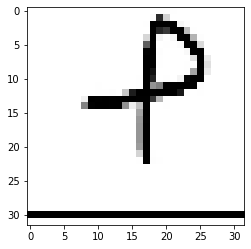

In [ ]:
plt.imshow(training_data[1])

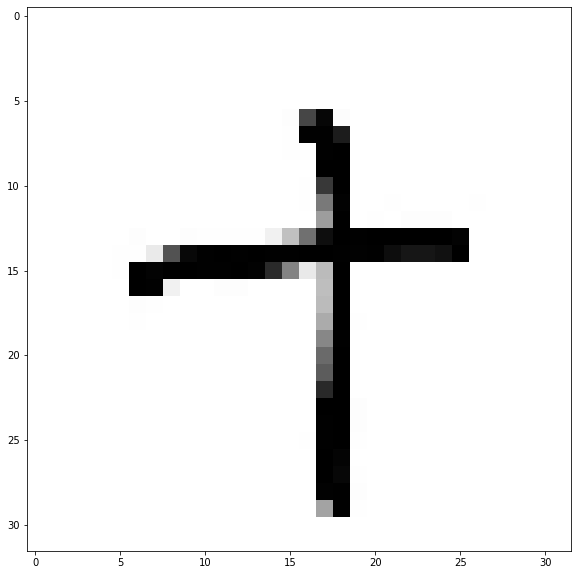

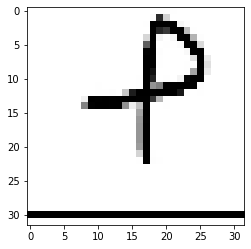

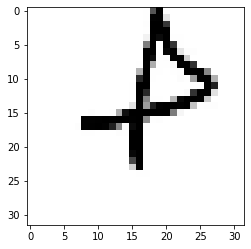

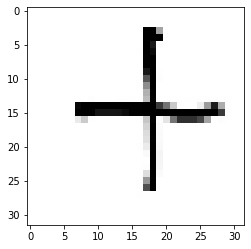

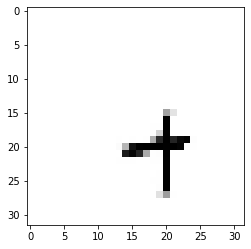

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.imshow(training_data[i])
    #plt.xlabel(class_names[training_label[i][0]])
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, training_label, test_size=0.1)

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

In [ ]:
y_test_coded = pd.get_dummies(y_test)
y_train_coded = pd.get_dummies(y_train)
print(y_train.shape)
print(X_train.shape)

(1973, 1)
(1973, 32, 32, 3)


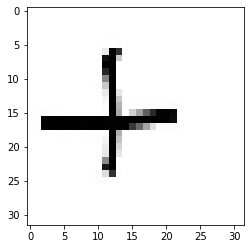

In [ ]:
import matplotlib.pyplot as plt
im = cv2.resize(cv2.imread('/content/2.2.jpg'),(32,32))
plt.imshow(im)
im.shape
im_second = im[0:128, 128:256]
#plt.imshow(im_second)
#im_second(cv2.resize(cv2.imread(d),(32,32)))

In [ ]:
im_test = np.asarray(im, 'float32')
im_test = im_test/255
im_test = im_test.reshape(1,32,32,3)
im_test.shape

(1, 32, 32, 3)

In [ ]:
predicted_Y = model.predict(im_test)
predYClasses = np.argmax(predicted_Y, axis = 1)

In [ ]:
predicted_Y
predYClasses

array([0])

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
classifier.add(Conv2D(32,(1,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.1))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(Conv2D(16,(1,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.1))
classifier.add(BatchNormalization(axis=3))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Conv2D(16,(1,1),activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(BatchNormalization(axis=3))
classifier.add(Flatten())
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(4,activation='softmax'))

In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = classifier.fit(X_train, y_train_coded, validation_data= (X_test, y_test_coded) ,epochs=10)

Epoch 1/10
62/62 [==============================] - 7s 87ms/step - loss: 1.1931 - accuracy: 0.4769 - val_loss: 1.3547 - val_accuracy: 0.2318
Epoch 2/10
62/62 [==============================] - 5s 74ms/step - loss: 0.2689 - accuracy: 0.9116 - val_loss: 1.3273 - val_accuracy: 0.3136
Epoch 3/10
62/62 [==============================] - 5s 74ms/step - loss: 0.1303 - accuracy: 0.9575 - val_loss: 1.9531 - val_accuracy: 0.2318
Epoch 4/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0994 - accuracy: 0.9676 - val_loss: 1.3330 - val_accuracy: 0.4909
Epoch 5/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0764 - accuracy: 0.9748 - val_loss: 1.3906 - val_accuracy: 0.4818
Epoch 6/10
62/62 [==============================] - 5s 75ms/step - loss: 0.0748 - accuracy: 0.9750 - val_loss: 0.2249 - val_accuracy: 0.9318
Epoch 7/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0574 - accuracy: 0.9774 - val_loss: 0.3243 - val_accuracy: 0.8636
Epoch 8/10
62

In [ ]:
pred_Y = classifier.predict(im_test)
predYC = np.argmax(pred_Y, axis = 1) 

In [ ]:
pred_Y

array([[9.9819916e-01, 8.4891303e-07, 1.7380699e-03, 6.1961036e-05]],
      dtype=float32)

In [ ]:
predYC

array([0])